In [163]:
 %matplotlib notebook

import obspy
from obspy.clients.fdsn import Client
from obspy import UTCDateTime
import matplotlib.pyplot as plt
client = Client("IRIS")
from matplotlib.dates import DateFormatter
import matplotlib.ticker as ticker
import numpy as np
import math

In [175]:
#waveform functions to make importing data easier
def waveforms(starttime, adj_endtime):
    start_t = UTCDateTime(starttime)
    end_t = start_t + adj_endtime
    event_st = client.get_waveforms("XB", "ELYSE", "02", "B*", start_t, end_t)
    return event_st

def short_waveforms(starttime, endtime):
    start_t = UTCDateTime(starttime)
    end_t = UTCDateTime(endtime)
    event_st = client.get_waveforms("XB", "ELYSE", "02", "B*", start_t, end_t)
    return event_st

def waveform_plotter(date, filtered, event, ax, ylim = False, channels = [0]):
    d = date[0:10]
    
    for channel in channels:
        full_code = filtered[channel].id
        code = full_code[12:]
        offset = channel * np.full(len(filtered[channel]), fill_value=200) 
        
        tr = filtered[channel]
        t = tr.times('matplotlib')
        
        if code == 'BHU':
            ax.plot(t, filtered[channel].data + offset, label=code, color = "#1f77b4", alpha = 0.7)
        elif code == 'BHV':
            ax.plot(t, filtered[channel].data + offset, label=code, color = "#ff7f0e", alpha = 0.7)
        elif code == 'BHW':
            ax.plot(t, filtered[channel].data + offset, label=code, color = "#2ca02c", alpha = 0.7)
        else:
            ax.plot(t, filtered[channel].data + offset, label="Unknown " + code, color = "black", alpha = 0.7)
    
    ax.xaxis_date()
    x_labels = ax.get_xticklabels()
    ax.set_xticklabels(x_labels, rotation=30, ha='right', va='center_baseline', size=9)
    ax.xaxis.set_major_formatter(DateFormatter('%H:%M:%S'))
    ax.xaxis.set_major_locator(ticker.MaxNLocator(8))
    
    if ylim == True:
        ax.set_ylim(-800,1000)

    ax.set_title("S0" + event + "\n" + "UTC " + d, size=10)
    
def waveform_filter(stream, event_type):
    
    stream.detrend('linear')
    stream.taper(max_percentage=0.05, type='cosine')
    
    if event_type == 'lf' or 'bb':
        filtered_stream1 = stream.filter('bandpass', freqmin = 0.125, freqmax = 0.5)
        return filtered_stream1
    elif event_type == 'hf':
        filtered_stream2 = stream.filter('highpass', freq = 1)
        return filtered_stream2
    elif event_type == '2.4':
        filtered_stream3 = stream.filter('bandpass', freqmin = 1, freqmax = 4)
        return filtered_stream3
    elif event_type == 'shf':
        filtered_stream4 = stream.filter('bandpass', freqmin = 8, freqmax = 15)
        return filtered_stream4
    elif event_type == 'vhf':
        filtered_stream5 = stream.filter('bandpass', freqmin == 5, freqmax = 10)
        return filtered_stream5
    else:
        text = "This isn't a valid event type"
        return text
    
def xyz_plotter(date, filtered, event, ax, ylim = False, channels=[0,1,2]):
    d = date[0:10]
    
    for channel in channels:
        full_code = filtered[channel].id
        code = full_code[12:]
        
        tr = filtered[channel]
        t = tr.times('matplotlib')
        
        if code == 'BHU':
            U = filtered[channel].data
        elif code == 'BHV':
            V = filtered[channel].data
        elif code == 'BHW':
            W = filtered[channel].data
            
    h1 = (-2)*U + V + W
    h2 = math.sqrt(3)*V - math.sqrt(3)*W
    z = math.sqrt(2)*U + math.sqrt(2)*V + math.sqrt(2)*W

    offset = np.full(len(z), fill_value=500)

    ax.plot(t, h1 + 2*offset, label='Horizontal 1', color = "#b28dff", alpha = 0.8)
    ax.plot(t, h2 + offset, label='Horizontal 2', color = "#77e59b", alpha = 0.8)
    ax.plot(t, z, label = 'Vertical', color = "#ffabab", alpha = 0.8)


    ax.xaxis_date()
    x_labels = ax.get_xticklabels()
    ax.set_xticklabels(x_labels, rotation=30, ha='right', va='center_baseline', size=9)
    ax.xaxis.set_major_formatter(DateFormatter('%H:%M:%S'))
    ax.xaxis.set_major_locator(ticker.MaxNLocator(8))

    if ylim == True:
        ax.set_ylim(-1800,2000)

    ax.set_title("S0" + event + "\n" + "UTC " + d, size=10)

<IPython.core.display.Javascript object>


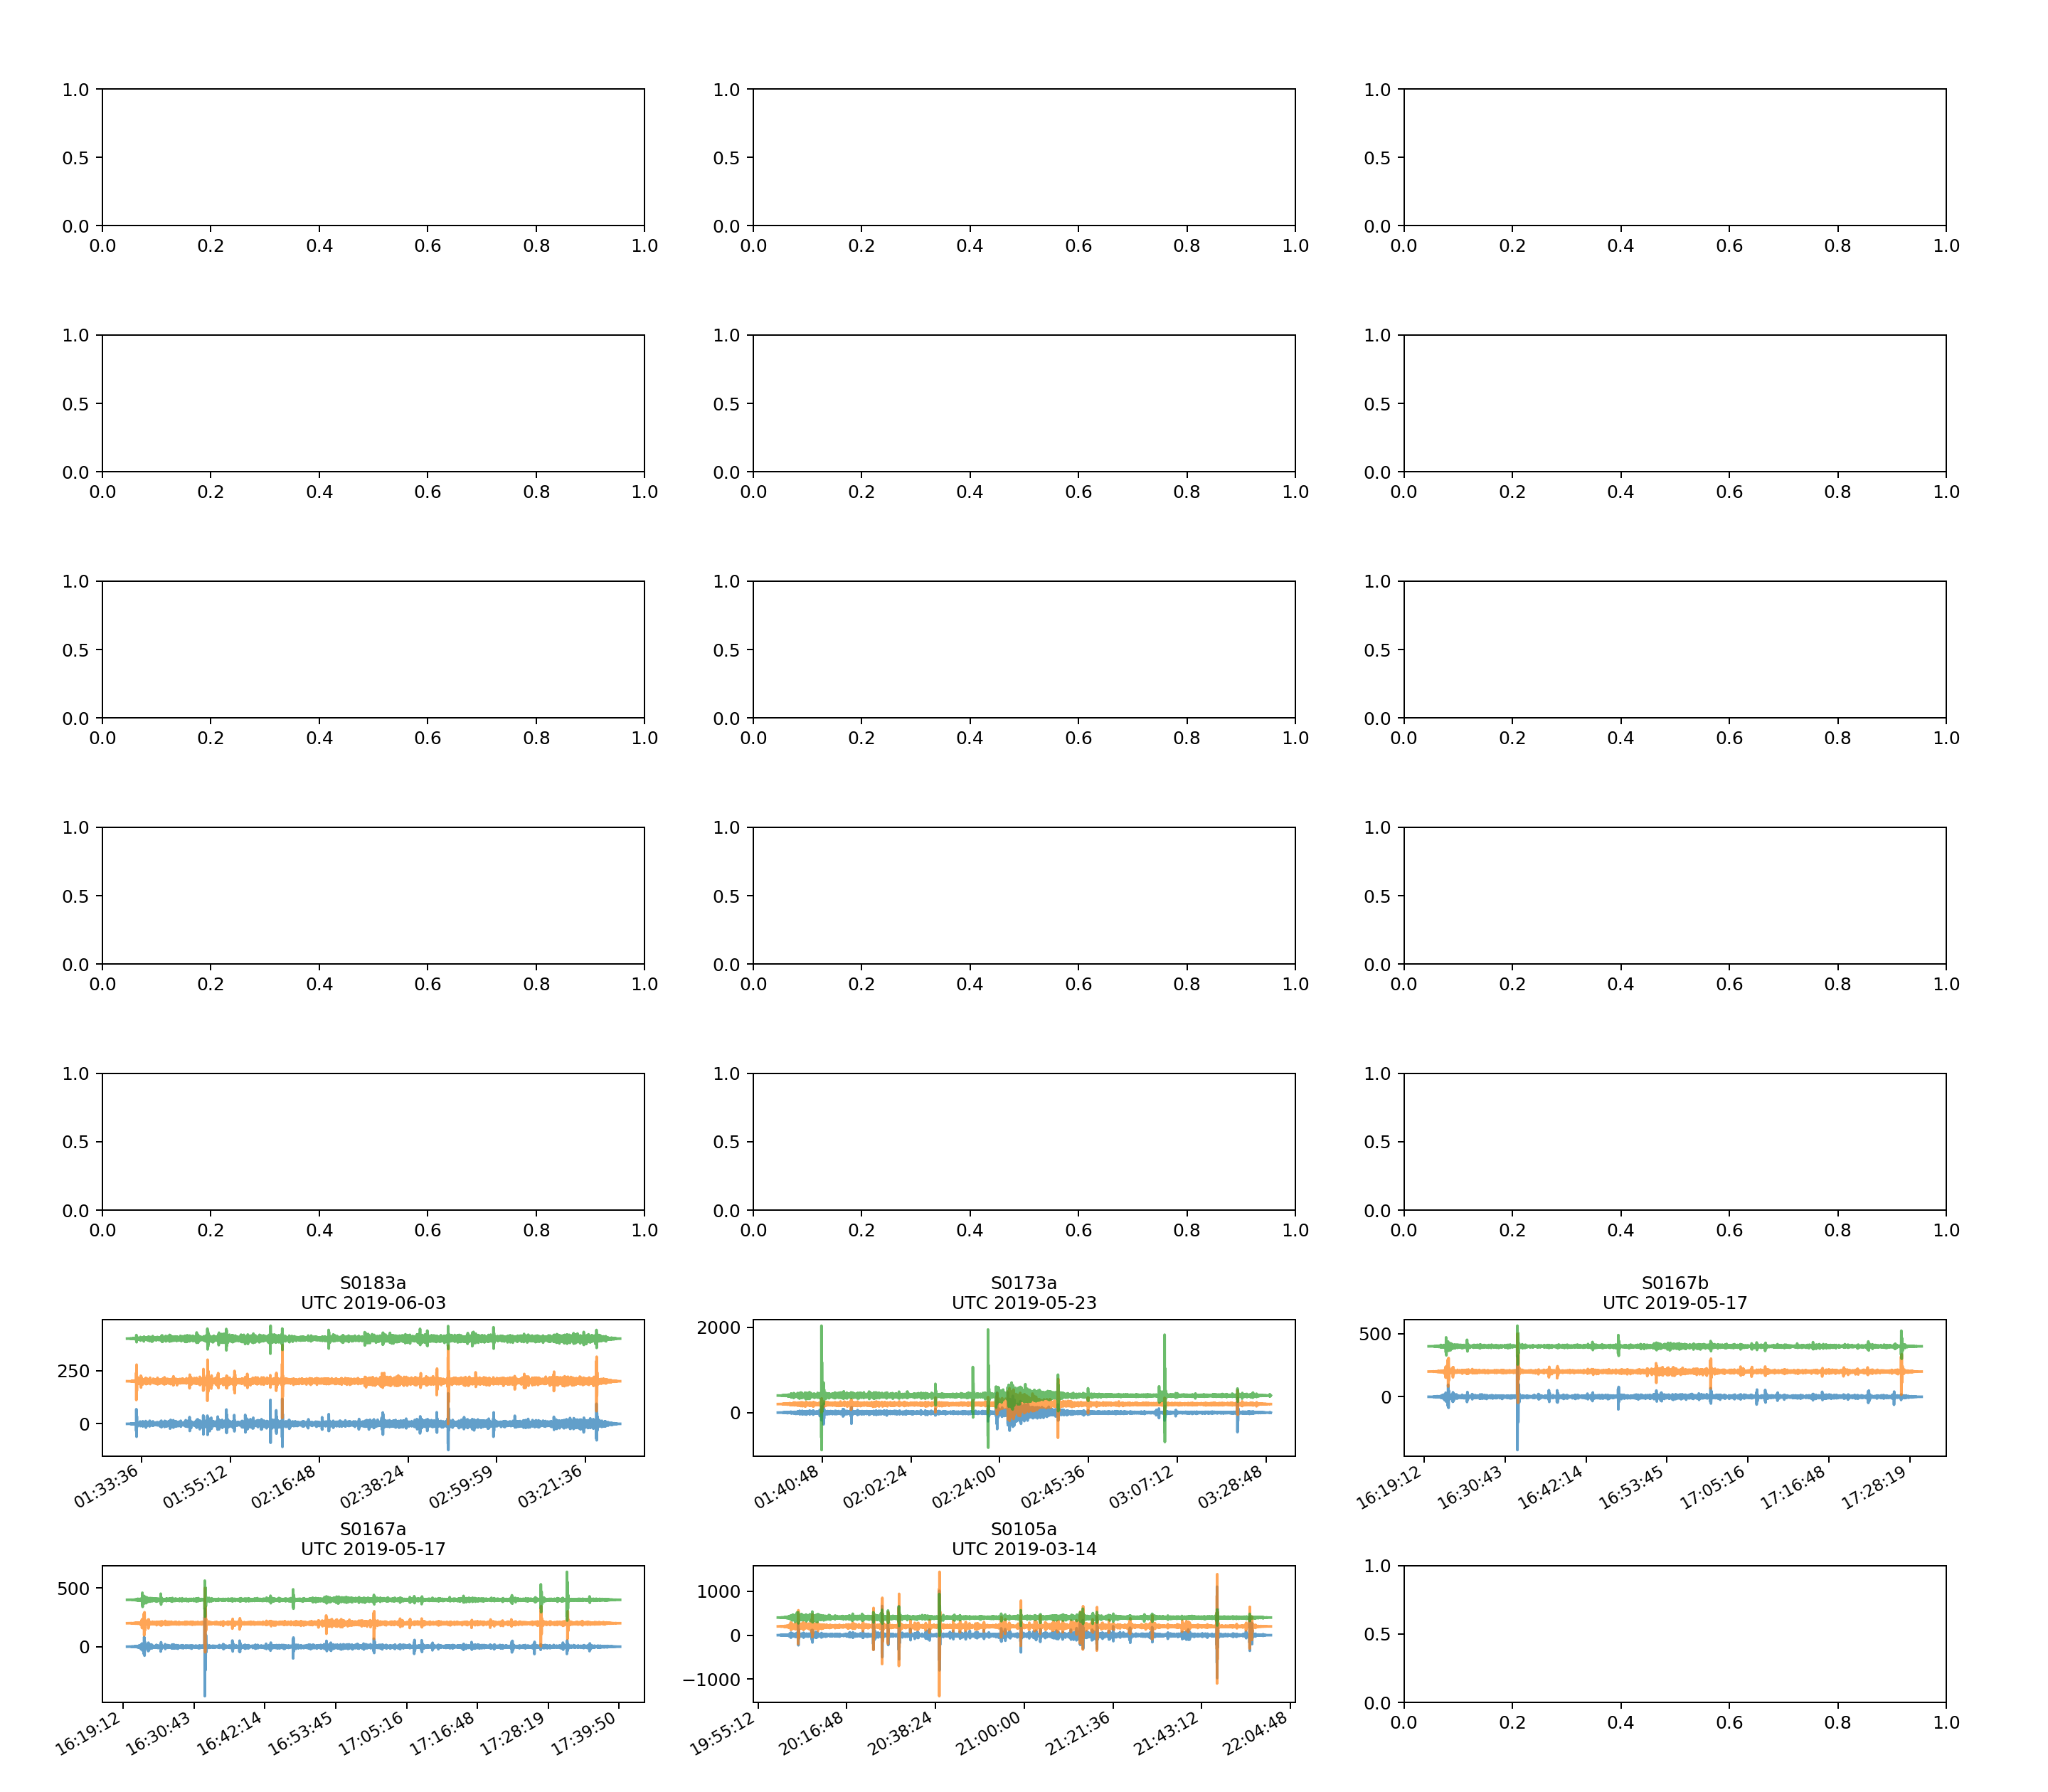

<IPython.core.display.Javascript object>


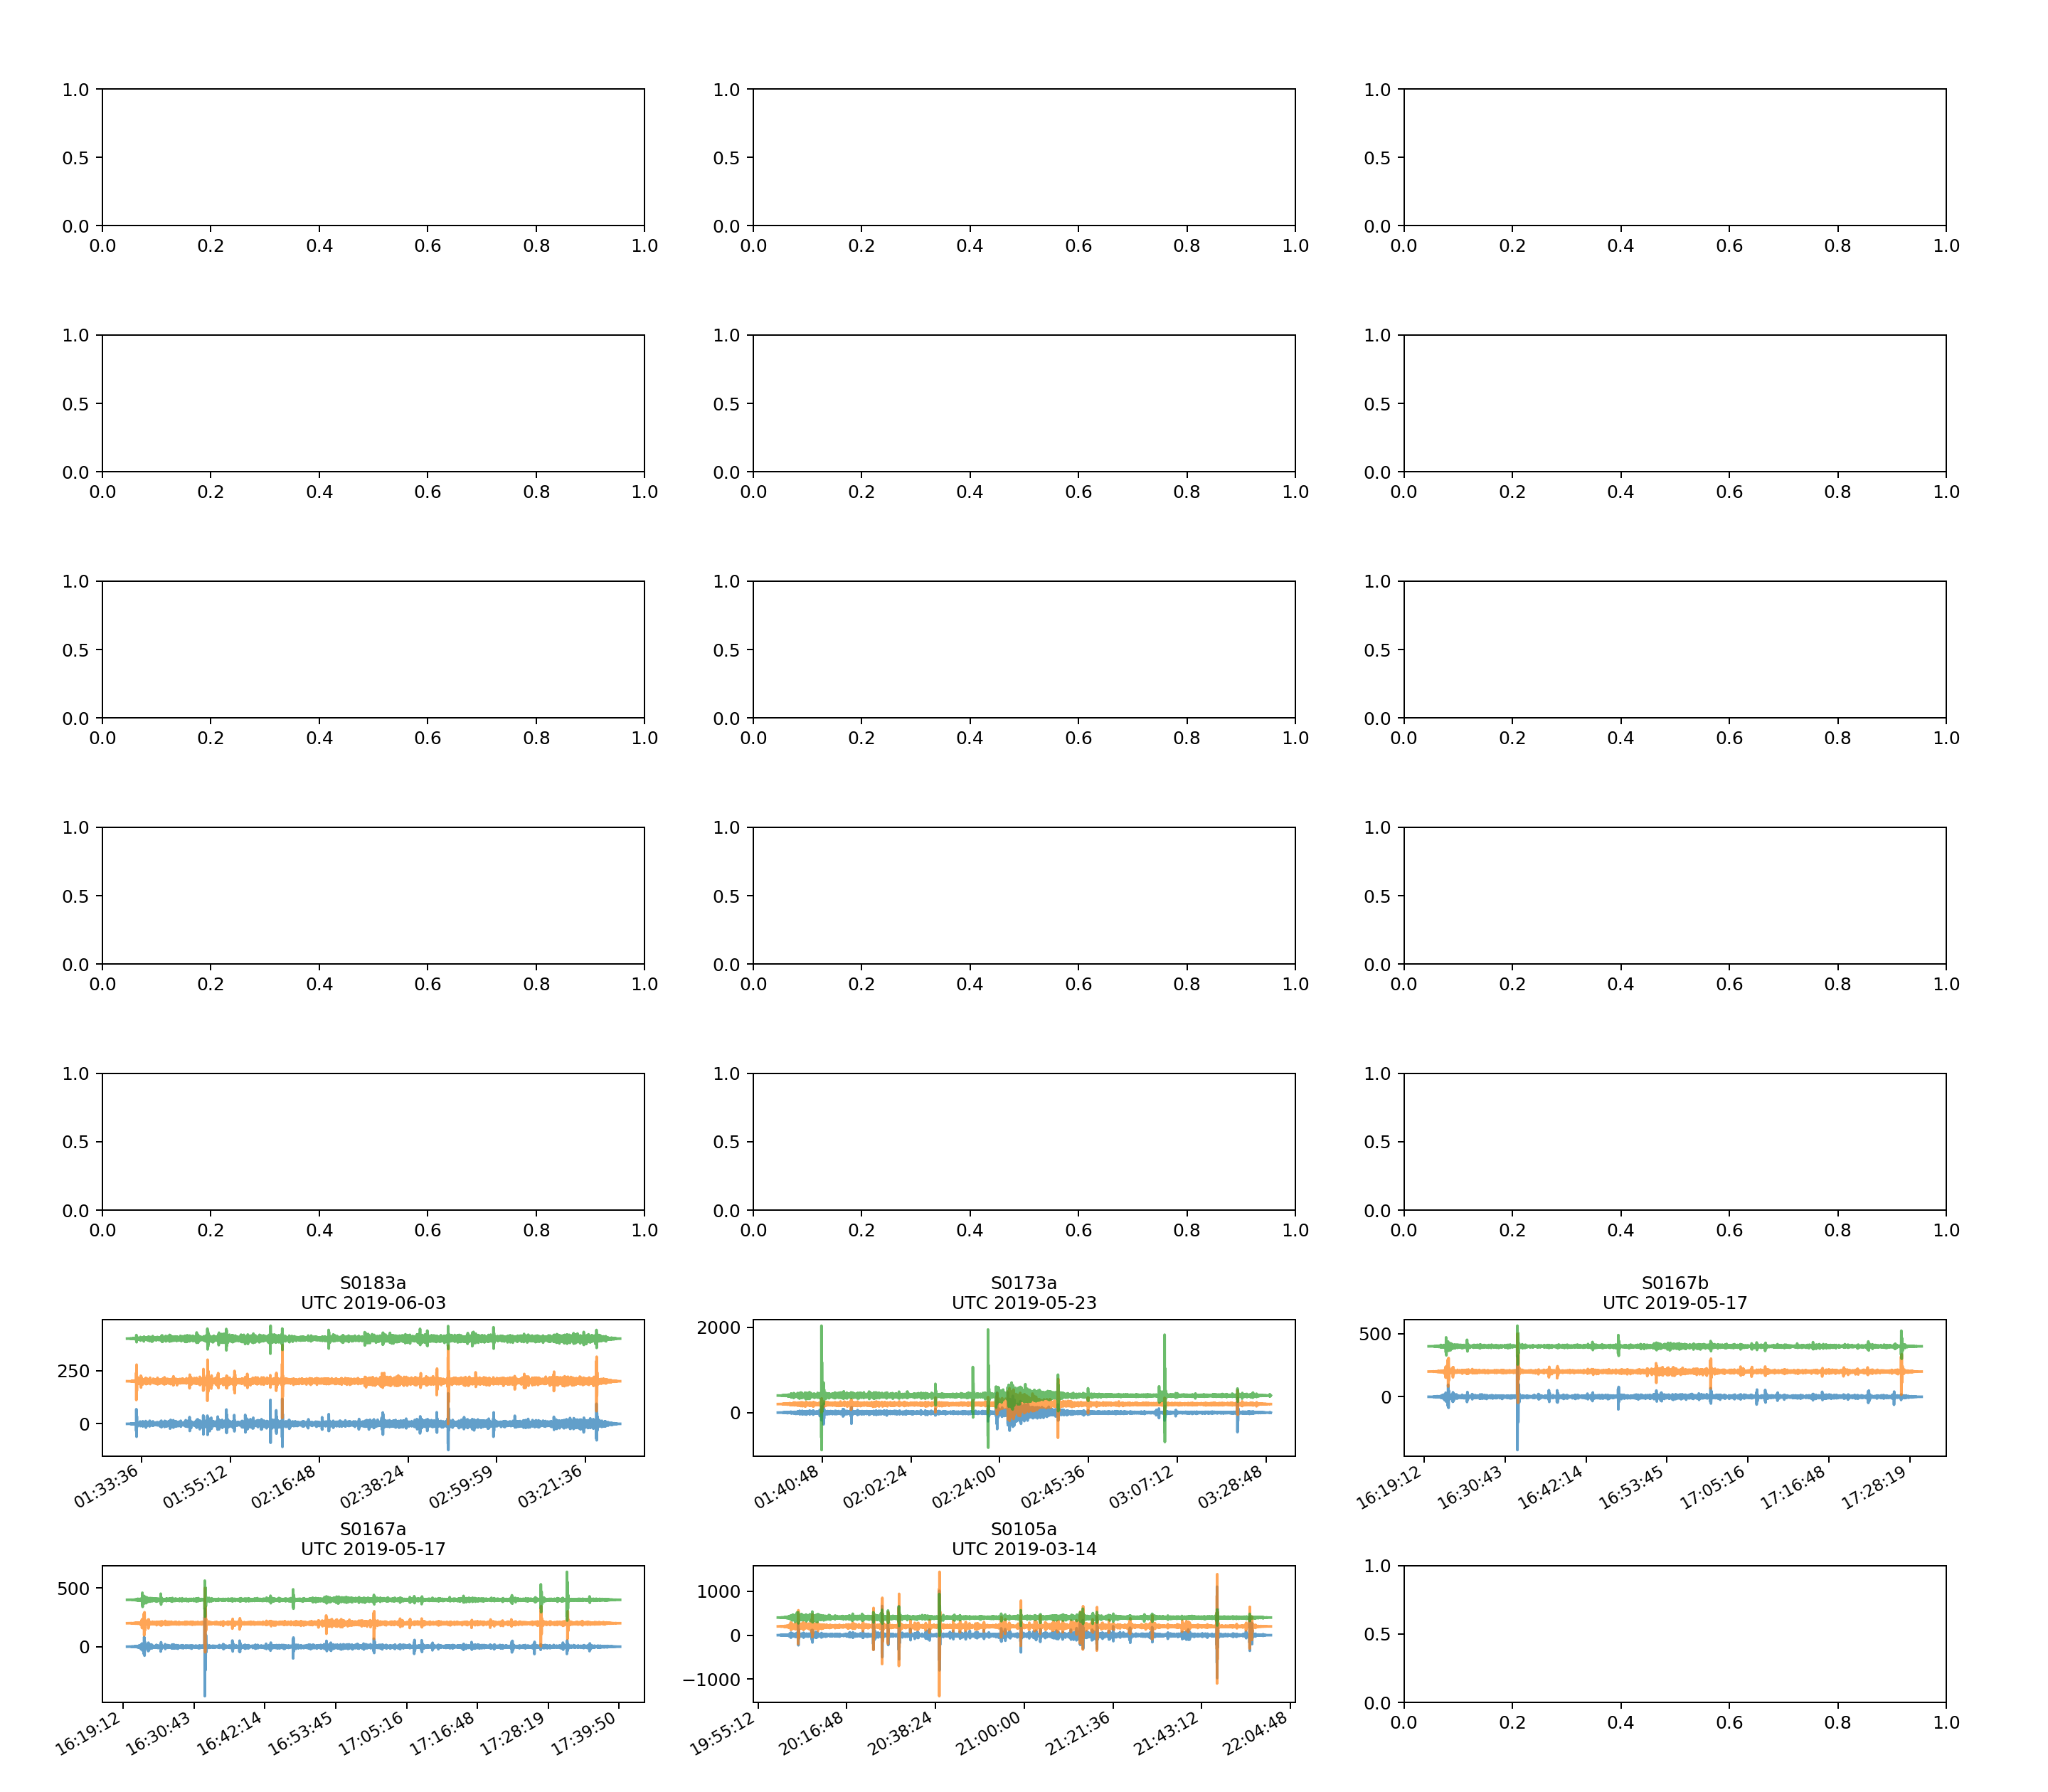

<IPython.core.display.Javascript object>


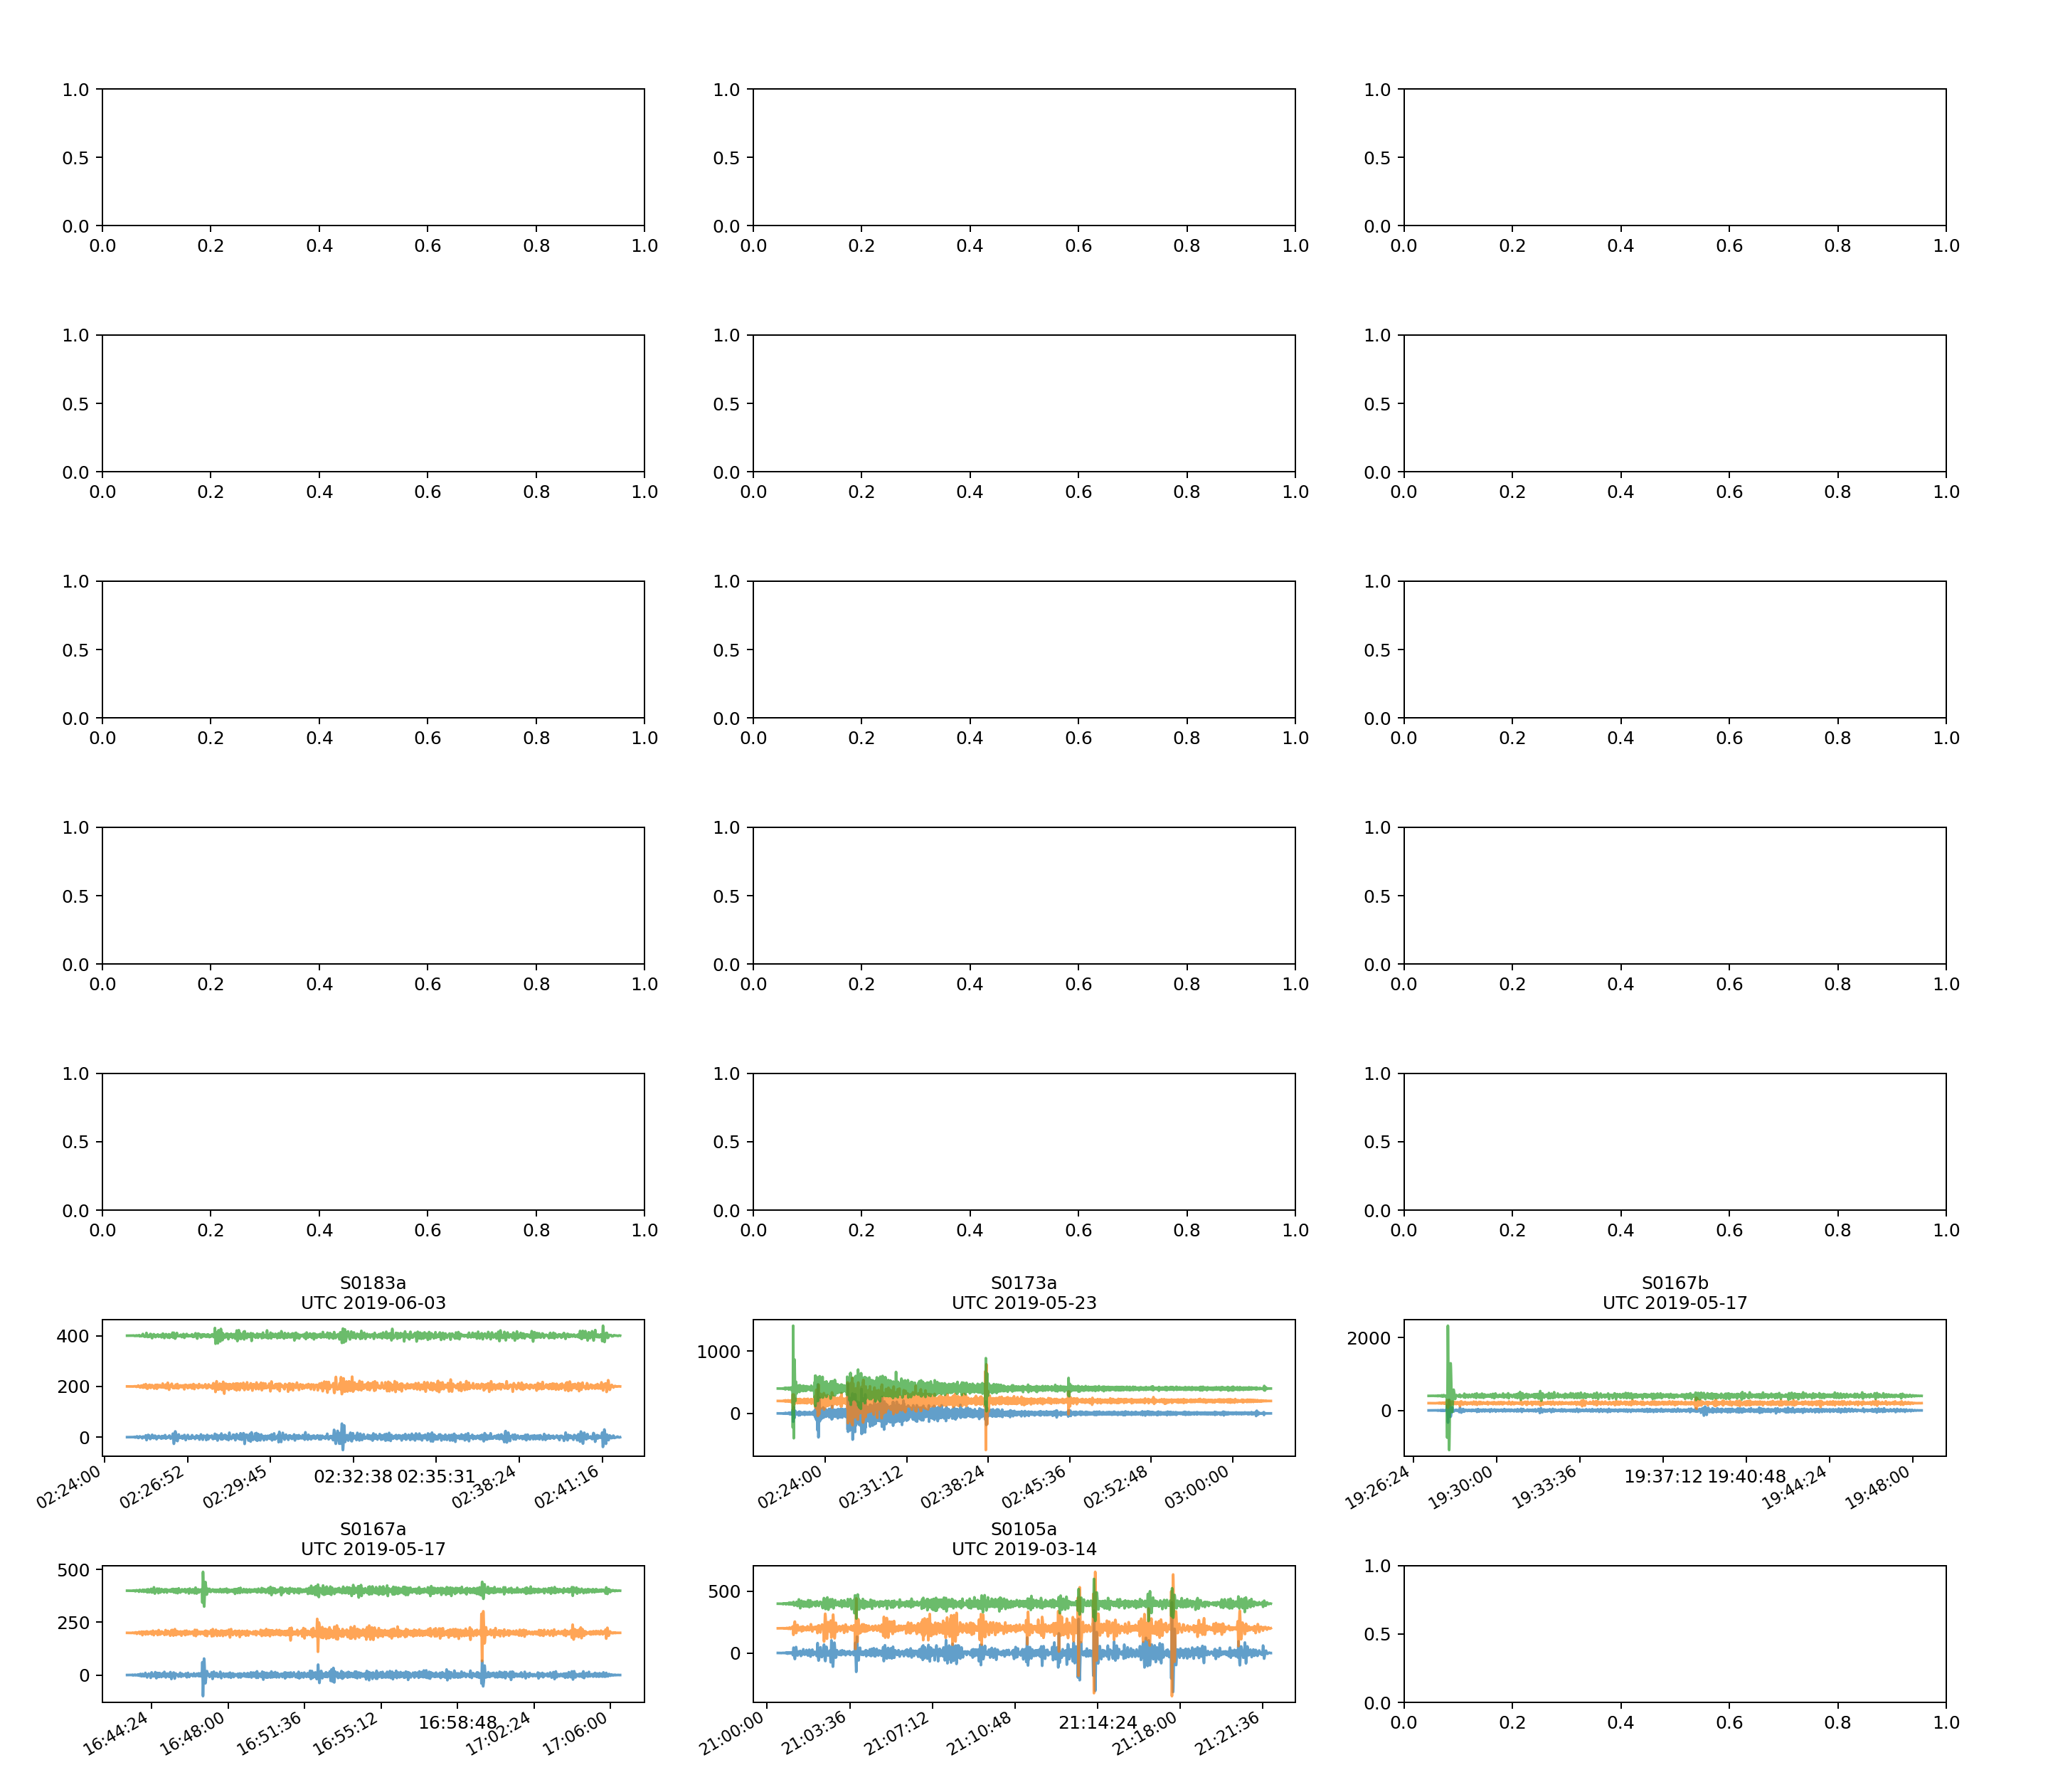

<IPython.core.display.Javascript object>


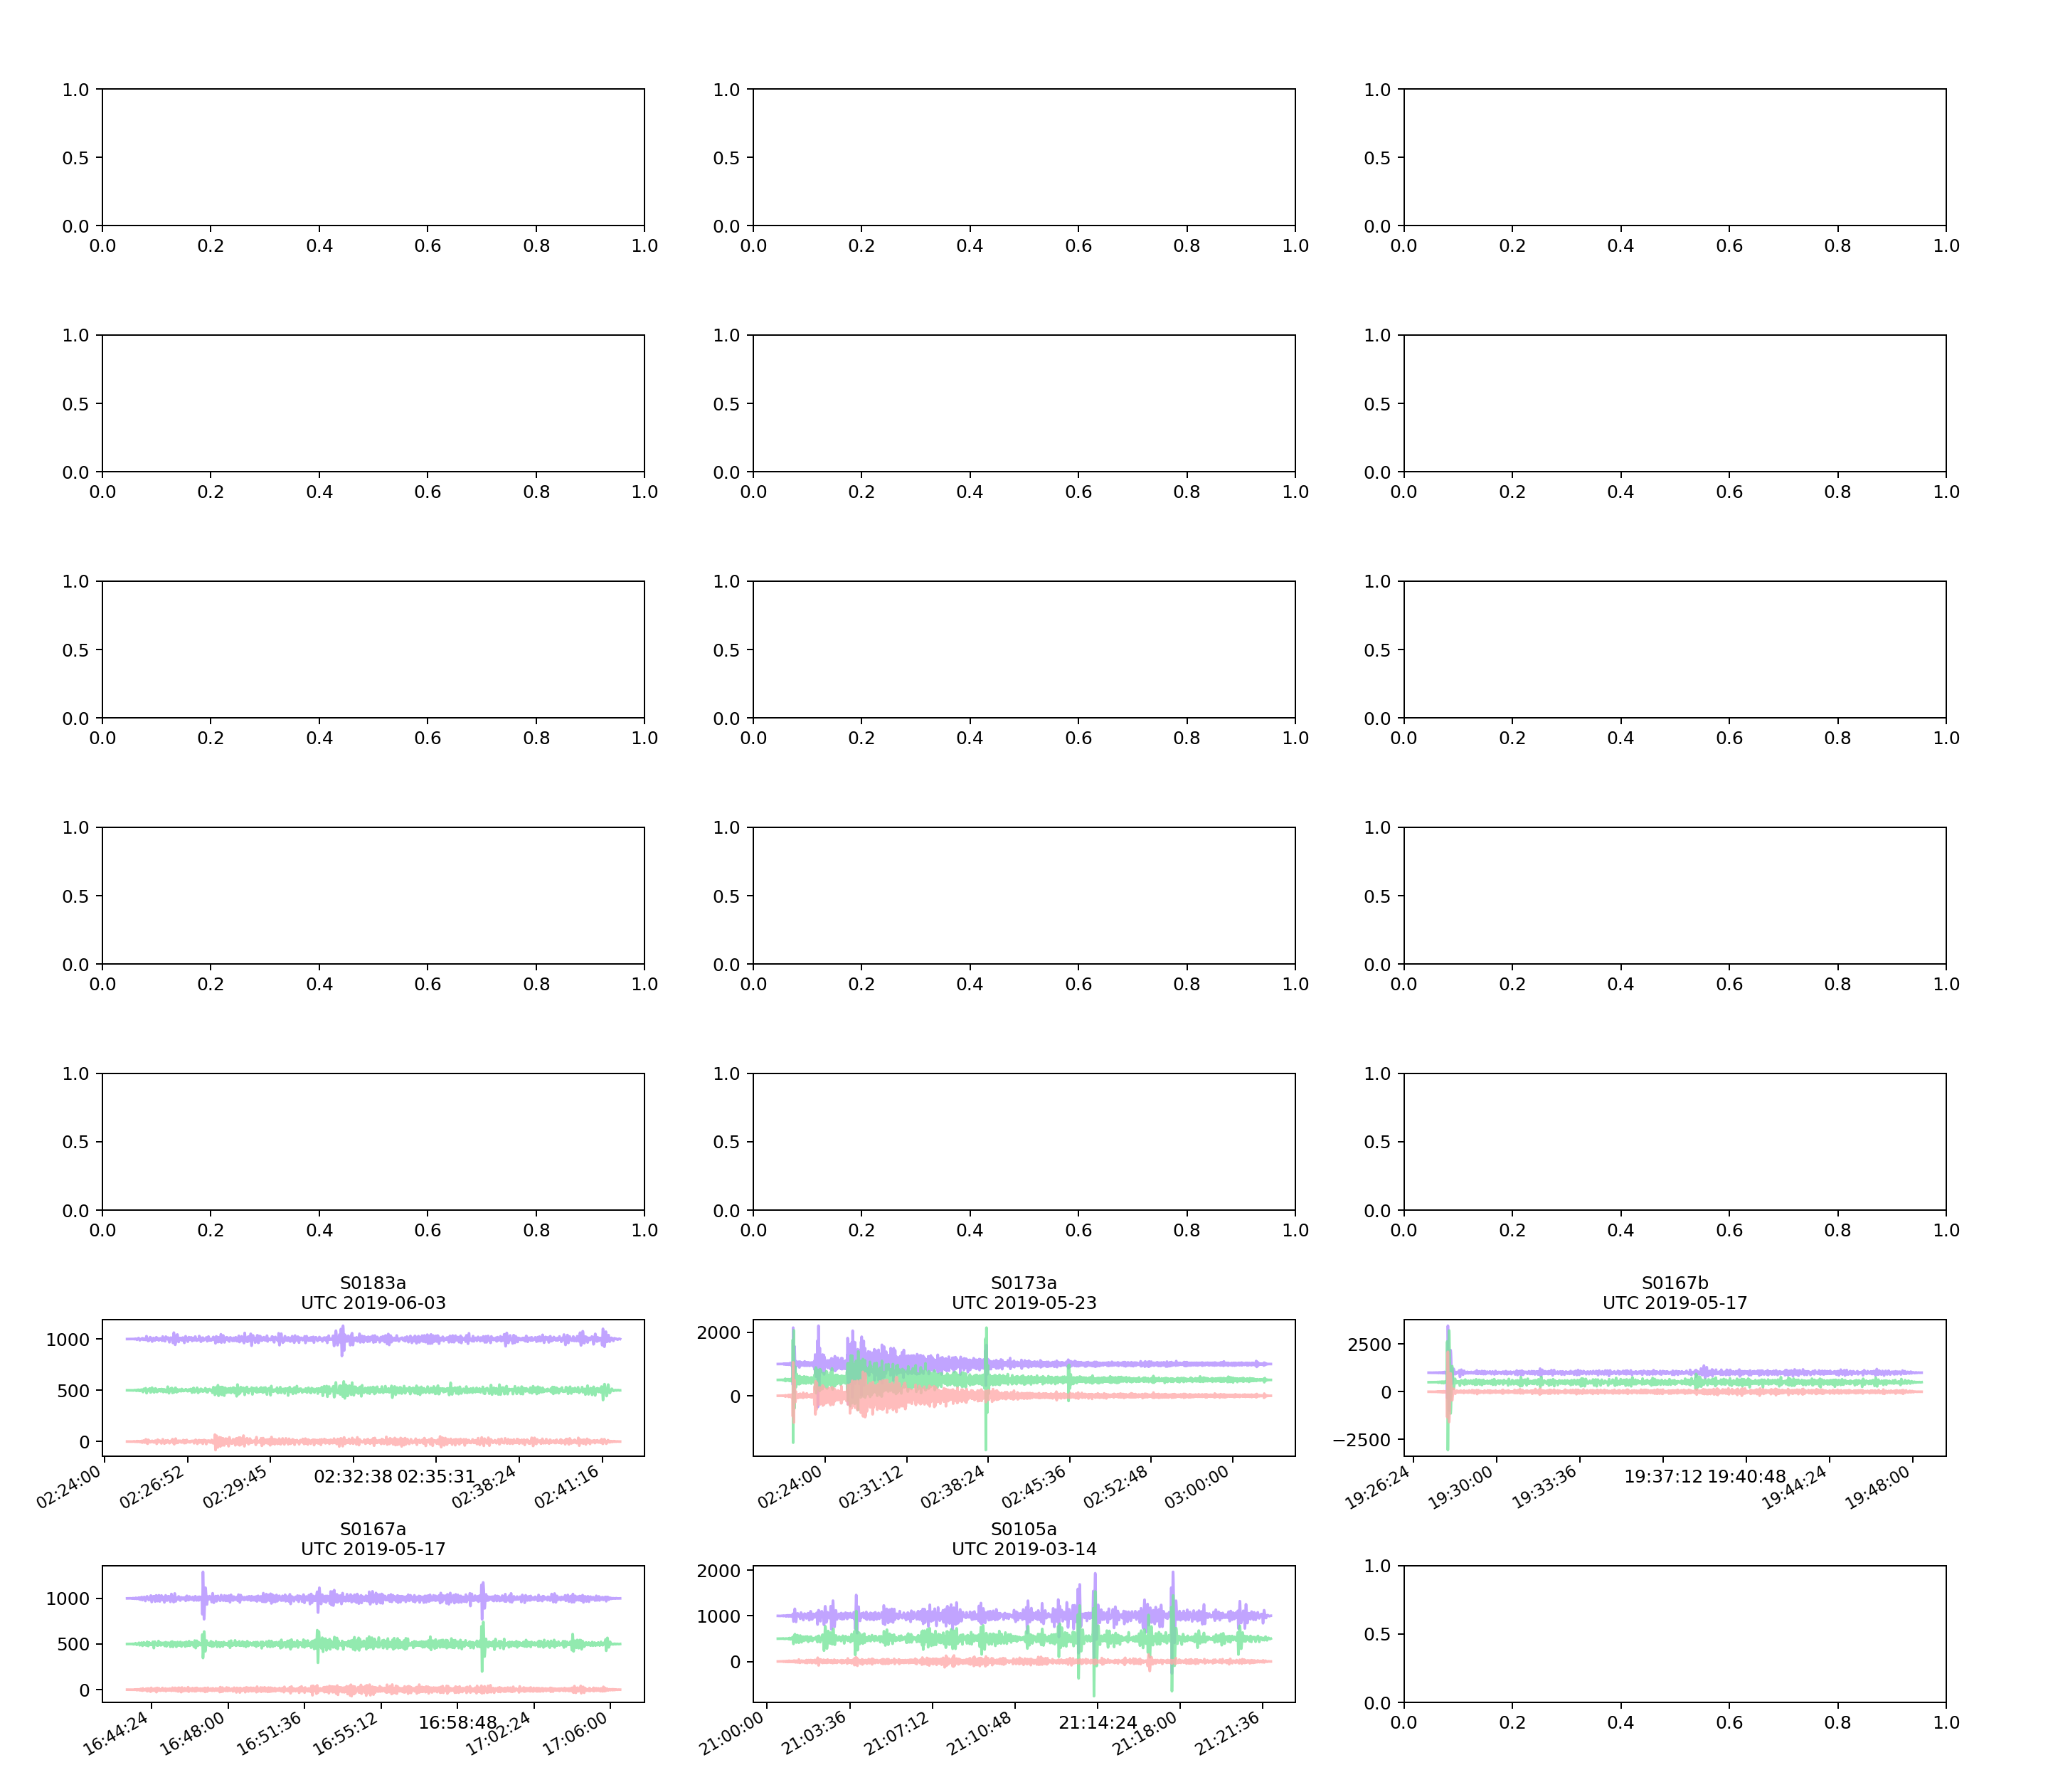

In [187]:
#creating subplot with 21 possible positions (20 events and 1 legend plot)
#ax[row][column]

#2hr window + filtered
fig1,ax = plt.subplots(7,3, figsize=(16,14))
plt.subplots_adjust(left=0.05, right=0.95, bottom=0.05, top=0.95, hspace=0.8)

#2hr window + unfiltered
fig2,ax1 = plt.subplots(7,3, figsize=(16,14))
plt.subplots_adjust(left=0.05, right=0.95, bottom=0.05, top=0.95, hspace=0.8)

#20min window + filtered
fig3,ax2 = plt.subplots(7,3, figsize=(16,14))
plt.subplots_adjust(left=0.05, right=0.95, bottom=0.05, top=0.95, hspace=0.8)

#Z12 20min window + filtered
fig4,ax3 = plt.subplots(7,3, figsize=(16,14))
plt.subplots_adjust(left=0.05, right=0.95, bottom=0.05, top=0.95, hspace=0.8)

***
***
***

# S0377c (C)
### 2019-12-19T11:57:20
Energy @ 12:00:08 - 12:10:14

In [170]:
t_377c = "2019-12-19T11:00:00"
st_377c = waveforms(t_377c, 7200)
f_377c = waveform_filter(st_377c, 'lf')
waveform_plotter(t_377c, f_377c, '377c', ax[0][0], channels= [0,1,2])

waveform_plotter(t_377c, st_377c, '377c', ax1[0][0], channels = [0,1,2])

st2_377c = short_waveforms("2019-12-19T11:57:00", "2019-12-19T12:13:14")
f2_377c = waveform_filter(st2_377c, 'lf')
waveform_plotter(t_377c, f2_377c, '377c', ax2[0][0], channels=[0,1,2])

xyz_plotter(t_377c, f2_377c, '377c', ax3[0][0])

***
***

# S0357a (D)
### 2019-11-28T19:22:00
Energy @ 19:24:59 - 19:48:55

P @ 19:25:02

In [171]:
t_357a = "2019-11-28-T18:20:00"
st_357a = waveforms(t_357a, 7200)
f_357a = waveform_filter(st_357a, 'lf')
waveform_plotter(t_357a, f_357a, '357a', ax[0][1], channels=[0,1,2])

waveform_plotter(t_357a, st_357a, '357a', ax1[0][1], channels=[0,1,2] )

st2_357a = short_waveforms("2019-11-28T19:21:59", "2019-11-28T19:51:55")
f2_357a = waveform_filter(st2_357a, 'lf')
waveform_plotter(t_357a, f2_357a, '357a', ax2[0][1], channels=[0,1,2])

xyz_plotter(t_357a, f2_357a, '357a', ax3[0][1])

***
***

# S0345a (D)
### 2019-11-16T12:03:41
Energy @ 12:06:04 - 12:28:11

In [172]:
t_345a = "2019-11-16T11:10:00"
st_345a = waveforms(t_345a, 7200)
f_345a = waveform_filter(st_345a, 'lf')
waveform_plotter(t_345a, f_345a, '345a', ax[0][2], channels=[0,1,2])

waveform_plotter(t_345a, st_345a, '345a', ax1[0][2], channels=[0,1,2])

st2_345a = short_waveforms("2019-11-16T12:03:04", "2019-11-16T12:31:11")
f2_345a = waveform_filter(st2_345a, 'lf')
waveform_plotter(t_345a, f2_345a, '345a', ax2[0][2], channels=[0,1,2])

xyz_plotter(t_345a, f2_345a, '345a', ax3[0][2])

***
***

# S0330a (D)
### 2019-10-31T10:05:39
Energy @ 10:20:08 - 10:39:43

In [173]:
t_330a = "2019-10-31T09:20:39"
st_330a = waveforms(t_330a, 7200)
f_330a = waveform_filter(st_330a, 'lf')
waveform_plotter(t_330a, f_330a, '330a', ax[1][0], channels=[0,1,2])

waveform_plotter(t_330a, st_330a, '330a', ax1[1][0], channels=[0,1,2])

st2_330a = short_waveforms("2019-10-31T10:17:08", "2019-10-31T10:41:08")
f2_330a = waveform_filter(st2_330a, 'lf')
waveform_plotter(t_330a, f2_330a, '330a', ax2[1][0], ylim=True, channels = [0,1,2])

xyz_plotter(t_330a, f2_330a, '330a', ax3[1][0])

***
***

# S0329b (D)
### 2019-10-31T00:42:58
Energy @ 00:44:20 - 00:49:19

In [174]:
t_329b = "2019-10-30T23:35:00"
st_329b = waveforms(t_329b, 7200)
f_329b = waveform_filter(st_329b, 'lf')
waveform_plotter(t_329b, f_329b, '329b', ax[1][1], channels=[0,1,2])

waveform_plotter(t_329b, st_329b, '329b', ax1[1][1], channels=[0,1,2])

t2_329b = "2019-10-31T00:42:58"
st2_329b = short_waveforms("2019-10-31T00:41:20", "2019-10-31T00:52:19")
f2_329b = waveform_filter(st2_329b, 'lf')
waveform_plotter(t2_329b, f2_329b, '329b', ax2[1][1], channels=[0,1,2])

xyz_plotter(t_329b, f2_329b, '329b', ax3[1][1])

***
***

# S0327d (D)
### 2019-10-29T04:20:35
Energy @ 04:21:53 - 04:28:11

In [176]:
t_327d = "2019-10-29T03:20:00"
st_327d = waveforms(t_327d, 7200)
f_327d = waveform_filter(st_327d, 'lf')
waveform_plotter(t_327d, f_327d, '327d', ax[1][2], channels=[0,1,2])

waveform_plotter(t_327d, st_327d, '327d', ax1[1][2], channels=[0,1,2])

st2_327d = short_waveforms("2019-10-29T04:18:53", "2019-10-29T04:31:11")
f2_327d = waveform_filter(st2_327d, 'lf')
waveform_plotter(t_327d, f2_327d, '327d', ax2[1][2], channels=[0,1,2])

xyz_plotter(t_327d, f2_327d, '327d', ax3[1][2])

***
***

# S0323d (D)
### 2019-10-25T00:20:29
Energy @ 00:26:42 - 00:37:24

In [177]:
t_323d = "2019-10-24T23:12:00"
st_323d = waveforms(t_323d, 7200)
f_323d = waveform_filter(st_323d, 'lf')
waveform_plotter(t_323d, f_323d, '323d', ax[2][0], channels=[0,1,2])

waveform_plotter(t_323d, st_323d, '323d', ax1[2][0], channels=[0,1,2])

t2_323d = "2019-10-25T00:20:29"
st2_323d = short_waveforms("2019-10-25T00:23:42", "2019-10-25T00:40:24")
f2_323d = waveform_filter(st2_323d, 'lf')
waveform_plotter(t2_323d, f2_323d, '323d', ax2[2][0], channels=[0,1,2])

xyz_plotter(t_323d, f2_323d, '323d', ax3[2][0])

***
***

# S00320b (D)
### 2019-10-21T20:09:07
Energy @ 20:14:42 - 20:27:38

In [178]:
t_320b = '2019-10-21T19:06:00'
st_320b = waveforms(t_320b, 7200)
f_320b = waveform_filter(st_320b, 'lf')
waveform_plotter(t_320b, f_320b, '320b', ax[2][1], channels=[0,1,2])

waveform_plotter(t_320b, st_320b, '320b', ax1[2][1], channels=[0,1,2])

st2_320b = short_waveforms("2019-10-21T20:11:41", "2019-10-21T20:30:38")
f2_320b = waveform_filter(st2_320b, 'lf')
waveform_plotter(t_320b, f2_320b, '320b', ax2[2][1], channels=[0,1,2])

xyz_plotter(t_320b, f2_320b, '320b', ax3[2][1])

***
***

# S0290b <span style='color:Orange'> (B)  </span>
### 2019-09-21T03:15:42
Energy @ 03:19:05 - 03:34:11

P @ 03:19:09

S @ 03:22:04

In [179]:
t_290b = "2019-09-21T02:20:00"
st_290b = waveforms(t_290b, 7200)
f_290b = waveform_filter(st_290b, 'lf')
waveform_plotter(t_290b, f_290b, '290b', ax[2][2], channels=[0,1,2])

waveform_plotter(t_290b, st_290b, '290b', ax1[2][2], channels=[0,1,2])

st2_290b = short_waveforms('2019-09-21T03:16:05', '2019-09-21T03:37:11')
f2_290b = waveform_filter(st2_290b, 'lf')
waveform_plotter(t_290b, f2_290b, '290b', ax2[2][2], channels=[0,1,2])

xyz_plotter(t_290b, f2_290b, '290b', ax2[2][2])

***
***
# S00254b (D)
### 2019-08-15T03:06:01
Energy @ 03:08:04 - 03:17:15

In [180]:
t_254b = "2019-08-15T02:10:00"
st_254b = waveforms(t_254b, 7200)
f_254b = waveform_filter(st_254b, 'lf')
waveform_plotter(t_254b, f_254b, '254b', ax[3][0], channels=[0,1,2])

waveform_plotter(t_254b, st_254b, '254b', ax1[3][0], channels=[0,1,2])

st2_254b = short_waveforms('2019-08-15T03:05:04', '2019-08-15T03:20:15')
f2_254b = waveform_filter(st2_254b, 'lf')
waveform_plotter(t_254b, f2_254b, '254b', ax2[3][0], channels=[0,1,2])

xyz_plotter(t_254b, f2_254b, '254b', ax3[3][0])

***
***
# S0251a (D)
### 2019-08-11T23:06:24
Energy @ 23:07:15 - 23:59:34

In [181]:
t_251a = '2019-08-11T22:00:00'
st_251a = waveforms(t_251a, 7200)
f_251a = waveform_filter(st_251a, 'lf')
waveform_plotter(t_251a, f_251a, '251a', ax[3][1], channels=[0,1,2])

waveform_plotter(t_251a, st_251a, '251a', ax1[3][1], channels=[0,1,2])

st2_251a = short_waveforms("2019-08-11T23:04:15", "2019-08-12T00:02:34")
f2_251a = waveform_filter(st2_251a, 'lf')
waveform_plotter(t_251a, f2_251a, '251a', ax2[3][1], channels=[0,1,2])

xyz_plotter(t_251a, f2_251a, '251a', ax3[3][1])

***
***
# S0240a (D)
### 2019-07-31T14:45:05
Energy @ 14:45:38 - 15:04:13

In [182]:
t_240a = "2019-07-31T13:45:00"
st_240a = waveforms(t_240a, 7200)
f_240a = waveform_filter(st_240a, 'lf')
waveform_plotter(t_240a, f_240a, '240a', ax[3][2], channels=[0,1,2])

waveform_plotter(t_240a, st_240a, '240a', ax1[3][2], channels=[0,1,2])

st2_240a = short_waveforms('2019-07-31T14:42:38', '2019-07-31T15:07:13')
f2_240a = waveform_filter(st2_240a, 'lf')
waveform_plotter(t_240a, f2_240a, '240a', ax2[3][2], channels=[0,1,2])

xyz_plotter(t_240a, f2_240a, '240a', ax3[3][2])

***
***
# S0234c (D)
### 2019-07-25T12:53:37
Energy Start @ 12:54:18

In [32]:
#t_234c = "2019-07-25T12:45:37"
#st_234c = waveforms(t_234c, 2700)
#f_234c = waveform_filter(st_234c, 'lf')
#waveform_plotter(t_234c, f_234c, '234c', ax[3][0], channels=[0,1,2])

***
***
# S0226b (C)
### 2019-07-17T05:36:45
Energy Start @ 05:43:38

In [118]:
#t_226b = "2019-07-17T05:35:45"
#st_226b = waveforms(t_226b, 2700)
#f_226b = waveform_filter(st_226b, 'lf')
#waveform_plotter(t_226b, f_226b, '226b', ax[3][1], channels=[0,1,2])

***
***
# S0205a (D)
### 2019-06-25T17:10:10
Energy @ 17:09:43 - 17:16:14

In [183]:
t_205a = "2019-06-25T16:00:00"
st_205a = waveforms(t_205a, 7200)
f_205a = waveform_filter(st_205a, 'lf')
waveform_plotter(t_205a, f_205a, '205a', ax[4][0], channels = [0,1,2])

waveform_plotter(t_205a, st_205a, '205a', ax1[4][0], channels = [0,1,2])

st2_205a = short_waveforms('2019-06-25T17:06:43', '2019-06-25T17:19:14')
f2_205a = waveform_filter(st2_205a, 'lf')
waveform_plotter(t_205a, f2_205a, '205a', ax2[4][0], channels=[0,1,2])

xyz_plotter(t_205a, f2_205a, '205a', ax3[4][0])

***
***
# S0201a (D)
### 2019-06-21T12:52:03
Energy @ 12:52:02 - 13:00:23

In [184]:
t_201a = "2019-06-21T11:50:00"
st_201a = waveforms(t_201a, 7200)
f_201a = waveform_filter(st_201a, 'lf')
waveform_plotter(t_201a, f_201a, '201a', ax[4][1], channels=[0,1,2])

waveform_plotter(t_201a, st_201a, '201a', ax1[4][1], channels=[0,1,2,])

st2_201a = short_waveforms('2019-06-21T12:49:02', '2019-06-21T13:03:23')
f2_201a = waveform_filter(st2_201a, 'lf')
waveform_plotter(t_201a, f2_201a, '201a', ax2[4][1], channels=[0,1,2])

xyz_plotter(t_201a, f2_201a, '201a', ax3[4][1])

***
***
# S0189a <span style='color:Orange'> (B)  </span>
### 2019-06-09T05:37:50
Energy @ 05:40:05 - 05:57:57

P @ 05:40:05

S @ 05:43:19

In [185]:
t_189a = "2019-06-09T04:40:00"
st_189a = waveforms(t_189a, 7200)
f_189a = waveform_filter(st_189a, 'lf')
waveform_plotter(t_189a, f_189a, '189a', ax[4][2], channels=[0,1,2])

waveform_plotter(t_189a, st_189a, '189a', ax1[4][2], channels=[0,1,2])

st2_189a = short_waveforms('2019-06-09T05:37:05', '2019-06-09T06:00:57')
f2_189a = waveform_filter(st2_189a, 'lf')
waveform_plotter(t_189a, f2_189a, '189a', ax2[4][2], channels=[0,1,2])

xyz_plotter(t_189a, f2_189a, '189a', ax3[4][2])

***
***
# S0183a (C)
### 2019-06-03T02:27:46
Energy @ 02:27:47 - 02:38:54

In [188]:
t_183a = "2019-06-03T01:30:00"
st_183a = waveforms(t_183a, 7200)
f_183a = waveform_filter(st_183a, 'lf')
waveform_plotter(t_183a, f_183a, '183a', ax[5][0], channels=[0,1,2])

waveform_plotter(t_183a, st_183a, '183a', ax1[5][0], channels=[0,1,2])

st2_183a = short_waveforms('2019-06-03T02:24:47', '2019-06-03T02:41:54')
f2_183a = waveform_filter(st2_183a, 'lf')
waveform_plotter(t_183a, f2_183a, '183a', ax2[5][0], channels = [0,1,2])

xyz_plotter(t_183a, f2_183a, '183a', ax3[5][0])

***
***
# S0173a <span style='color:Red'> (A)  </span>
### 2019-05-23T02:19:33
Energy @ 02:22:48 - 03:00:23

P @ 02:22:59

S @ 02:25:53

In [189]:
t_173a = "2019-05-23T01:30:00"
st_173a = waveforms(t_173a, 7200)
f_173a = waveform_filter(st_173a, 'lf')
waveform_plotter(t_173a, f_173a, '173a', ax[5][1], channels=[0,1,2])

waveform_plotter(t_173a, st_173a, '173a', ax1[5][1], channels=[0,1,2])

st2_173a = short_waveforms('2019-05-23T02:19:48', '2019-05-23T03:03:23')
f2_173a = waveform_filter(st2_173a, 'lf')
waveform_plotter(t_173a, f2_173a, '173a', ax2[5][1], channels=[0,1,2])

xyz_plotter(t_173a, f2_173a, '173a', ax3[5][1])

***
***
# S0171a (D)
### 2019-05-21T18:54:03
Energy Start @ 18:56:52

In [43]:
#t_171a = "2019-05-21T18:49:00"
#st_171a = waveforms(t_171a, 2700)
#f_171a = waveform_filter(st_171a, 'lf')
#waveform_plotter(t_171a, f_171a, '171a', ax[5][0], channels=[0,1,2,])

***
***
# S0167b (C)
### 2019-05-17T16:29:32
Energy @ 19:30:04 - 19:45:22

In [190]:
t_167b = "2019-05-17T15:30:00"
st_167b = waveforms(t_167b, 7200)
f_167b = waveform_filter(st_167b, 'lf')
waveform_plotter(t_167b, f_167b, '167b', ax[5][2], channels=[0,1,2])

waveform_plotter(t_167b, st_167b, '167b', ax1[5][2], channels=[0,1,2])

st2_167b = short_waveforms('2019-05-17T19:27:04', '2019-05-17T19:48:22')
f2_167b = waveform_filter(st2_167b, 'lf')
waveform_plotter(t_167b, f2_167b, '167b', ax2[5][2], channels=[0,1,2])

xyz_plotter(t_167b, f2_167b, '167b', ax3[5][2])

***
***
# S0167a (C)
### 2019-05-17T16:39:32
Energy @ 16:47:15 - 17:03:27

In [191]:
t_167a = "2019-05-17T15:40:00"
st_167a = waveforms(t_167a, 7200)
f_167a = waveform_filter(st_167a, 'lf')
waveform_plotter(t_167a, f_167a, '167a', ax[6][0], channels=[0,1,2])

waveform_plotter(t_167a, st_167a, '167a', ax1[6][0], channels=[0,1,2])

st2_167a = short_waveforms('2019-05-17T16:43:15', '2019-05-17T17:06:27')
f2_167a = waveform_filter(st2_167a, 'lf')
waveform_plotter(t_167a, f2_167a, '167a', ax2[6][0], channels=[0,1,2])

xyz_plotter(t_167a, f2_167a, '167a', ax3[6][0])

***
***
# S0105a <span style='color:Orange'> (B)  </span>
### 2019-03-14T20:59:38
Energy @ 21:03:28 - 21:18:57

In [192]:
t_105a = "2019-03-14T20:00:00"
st_105a = waveforms(t_105a, 7200)
f_105a = waveform_filter(st_105a, 'lf')
waveform_plotter(t_105a, f_105a, '105a', ax[6][1], channels=[0,1,2])

waveform_plotter(t_105a, st_105a, '105a', ax1[6][1], channels=[0,1,2])

st2_105a = short_waveforms('2019-03-14T21:00:28', '2019-03-14T21:21:57')
f2_105a = waveform_filter(st2_105a, 'lf')
waveform_plotter(t_105a, f2_105a, '105a', ax2[6][1], channels=[0,1,2])

xyz_plotter(t_105a, f2_105a, '105a', ax3[6][1])